## Phase 3

### Header
#### Course Name: CSE574 - Data Intensive Computing.
#### Project name: Stocks of Mineral and Energy resources. 
#### Name of group member: Ananth Deepak Sharma Nanduri, Omkar Srivatsava Potnuru

### Q Write down the following information: 
#### 1. Problem Statement: 
Mineral and energy resources are one of the seven environmental assets considered in the System of Environmental Economic Accounting(SEEA). These are non renewable energy resources. From an economic, environmental and supply security perspective it is important to keep an eye on the rate of extraction and current availability.

Stocks and flows of these commodities are complied in physical units and 3 classes are defined: commercially recoverable resources (Class A), potentially commercially recoverable resources (Class B) and non-commercial and other known deposits (Class C)

We are trying to answer on how better can countries perform in preserving the natural resources reducing the discrepancies. As the future power would be with the countries having loaded stocks of mineral and energy resources.


#### 2. Hypothesis:
   + hypothesis 1: Which country contains most stocks of natural resources?  
   + hypothesis 2: Efforts required in storage and reduce disperencies of stock in future?
   

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [30]:
# import your cleaned dataset
import csv
import pandas as pd

data = pd.read_csv('data/DataAfterEDA.csv')
data.head()
# display the first five rows data.head(5)

,Country,Resource,Stocks and flows,CLASSE,PowerCode,Unit,Year,Value
0,0.0,0.0,0.0,0.0,0.0,0.0,2009.0,0.007
1,1.0,0.0,1.0,1.0,0.0,0.0,2017.0,0.300
2,1.0,0.0,1.0,1.0,0.0,0.0,2016.0,0.400
3,1.0,0.0,1.0,1.0,0.0,0.0,2015.0,-0.300
4,1.0,0.0,1.0,1.0,0.0,0.0,2014.0,-0.750


#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

In [31]:
# code for modeling
from sklearn.model_selection import train_test_split
import numpy as np
data_np = data.to_numpy()
print(data_np.shape)
X = data_np[0:3794, 0:7 ]
y = data_np[0:3794, 7:8 ]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3794, 8)
(3794, 7)
(3794, 1)


**4.1 Method 1**

#### Q: What assumptions need to be verified at this step?
#### A: We are going to predict the amount of natural resources in the given countries. So we know that the predicted value should be a continuous number in other words a real integer. So we assume that the range of our dependent variable y is negative infinity to positive infinity.
#### Q: What algorithm did you choose?
#### A: Tweedie regression - Generalized Linear Regression
#### Q: Why you choose this algorithm?
#### A: The predicted values are linked to a linear combination of the input variables via an inverse link function the squared loss function is replaced by the unit deviance of a distribution in the exponential family (or more precisely, a reproductive exponential dispersion model (EDM)) which replicates the data we choose as seen in EDA.
#### Q: What metric can measure the quality of your algorithm?
#### A: We would use MSE and R2 scores
#### Q: What is the outcome?
#### A: We used 80% of stock values to train the GLR model and 20% to test. Using Tweedie regressor the Mean Squared Error of stocks is 0.02076853656, showing that maintenance techniques are too bad but since our R2 score for this model -2.288814333 that means we might have more models which can do better. 
#### Q: Analysis and discussion:
#### A: Seeing the R2 score of the Generalized Linear Regression using Tweedie distribution we might be wrong in predicting the sustainability of maintenance of Natural Resources being followed by countries. So, we tried to use Neural Networks as next model.

In [32]:
from sklearn.linear_model import TweedieRegressor   #Generalized Linear
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
scaler.fit(y_test)
y_test_scaled = scaler.transform(y_test)

reggen = TweedieRegressor(power=1, alpha=0.5, link='log')
reggen.fit(X_train_scaled, y_train_scaled)
y_pred_gen = reggen.predict(X_test_scaled)
score1 = metrics.mean_squared_error(y_test_scaled,y_pred_gen)
score2 = metrics.r2_score(y_test_scaled,y_pred_gen)
print('MSE: ',score1, '  R2 Score: ', score2)

MSE:  0.020768536556491756   R2 Score:  -2.288814333117901
C:\Users\Ananth Deepak Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


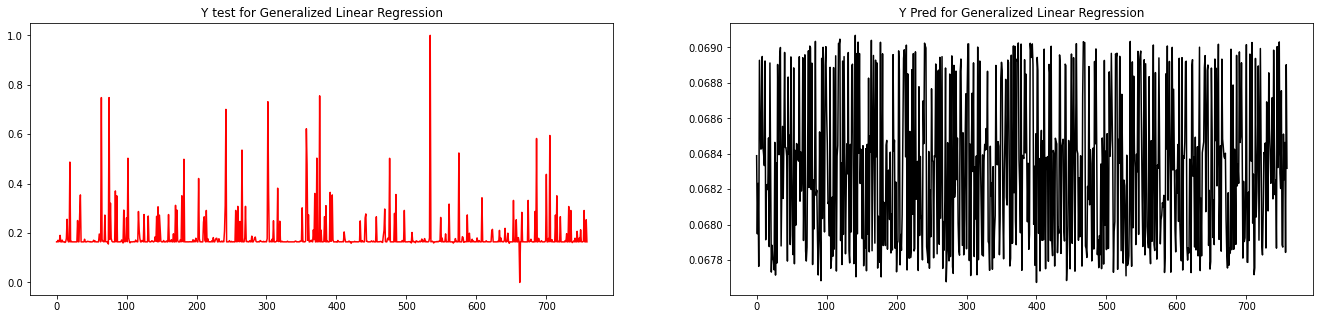

In [33]:
#For visualizing the outcome
import matplotlib.pyplot as plt
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test_scaled, color='red', label='Regression model')
ax1.set_title("Y test for Generalized Linear Regression")
ax2.plot(test_data_range, y_pred_gen, color='k', label='Regression model')
ax2.set_title("Y Pred for Generalized Linear Regression")
plt.show()


**4.1 Method 2**

#### Q: What assumptions need to be verified at this step?
#### A: Support vector Machine performs well only when the input data is linearly separable i.e, when we can separate the input data in the feature space with a decision boundary. So, at this point we should assume that the input dataset is linearly separable.
#### Q: What algorithm did you choose?
#### A: Support Vector Machine(SVM)
#### Q: Why you choose this algorithm?
#### A: The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.
#### Q: What metric can measure the quality of your algorithm?
#### A: R2 Score and Mean Squared Error(MSE)
#### Q: What is the outcome?
#### A: The R2 score for this method is -0.0925 and the mean square error is 1785888.9837039267. So as the R2 score is negative for this method we shouldn't proceed with this model.
#### Q: Analysis and discussion:
#### A: Hence we should not use support vector machine algorithm for this dataset, even though the input data is linearly separable we are not able to find a perfect decision boundary between different clusters of the input.

In [34]:
# code for modeling        SVM
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
y_pred_svm = regr.predict(X_test)
score1 = metrics.mean_squared_error(y_test,y_pred_svm)
score2 = metrics.r2_score(y_test,y_pred_svm)
print('MSE: ',score1, '  R2 Score: ', score2)

C:\Users\Ananth Deepak Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
MSE:  1785888.9837039267   R2 Score:  -0.09253042779198051


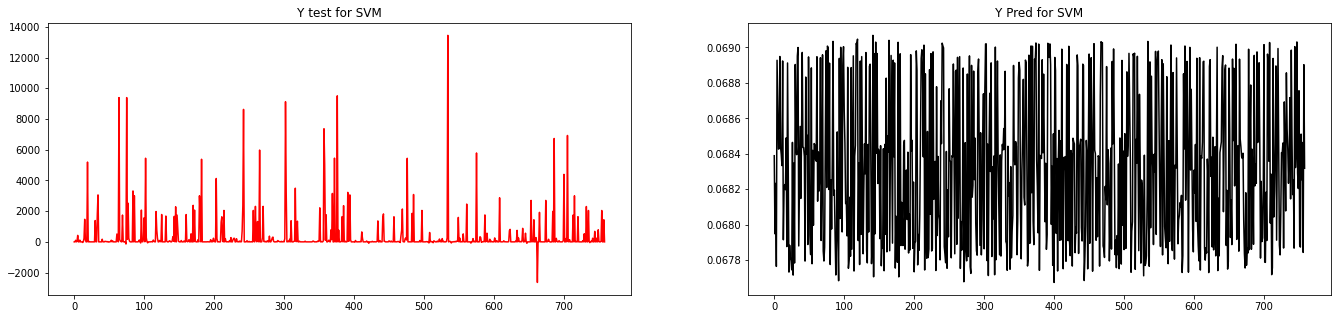

In [35]:
#For visualizing the outcome
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test, color='red', label='Regression model')
ax1.set_title("Y test for SVM")
ax2.plot(test_data_range, y_pred_gen, color='k', label='Regression model')
ax2.set_title("Y Pred for SVM")
plt.show()


**4.1 Method 4**

#### Q: What assumptions need to be verified at this step?
#### A: The HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from TheilSenRegressor and RANSACRegressor because it does not ignore the effect of the outliers but gives a lesser weight to them. So we assume that the absolute error of the sample being considered is lesser than a certain threshold.
#### Q: What algorithm did you choose?
#### A: Huber Regression
#### Q: Why you choose this algorithm?
#### A: The HuberRegressor differs from using SGDRegressor with loss set to huber in the following ways.
HuberRegressor is scaling invariant. Once epsilon is set, scaling X and y down or up by different values would produce the same robustness to outliers as before. as compared to SGDRegressor where epsilon has to be set again when X and y are scaled.
HuberRegressor should be more efficient to use on data with small number of samples while SGDRegressor needs a number of passes on the training data to produce the same robustness.
#### Q: What metric can measure the quality of your algorithm?
#### A: R2 Score and MSE.
#### Q: What is the outcome?
#### A: The R2 score is -0.06 and MSE is 17389. So we can conclude that Huber regression is not a correct fit for this dataset
#### Q: Analysis and discussion:
#### A: So as we can see that Huber regression is not a correct model for this data. So we proceed with the basic linear regression for the given dataset.

In [36]:
# code for modeling                Huber
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor().fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)
score1 = metrics.mean_squared_error(y_test,y_pred_huber)
score2 = metrics.r2_score(y_test,y_pred_huber)
print('MSE: ',score1, '  R2 Score: ', score2)


MSE:  1738965.7871794028   R2 Score:  -0.06382482490171482
C:\Users\Ananth Deepak Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ananth Deepak Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


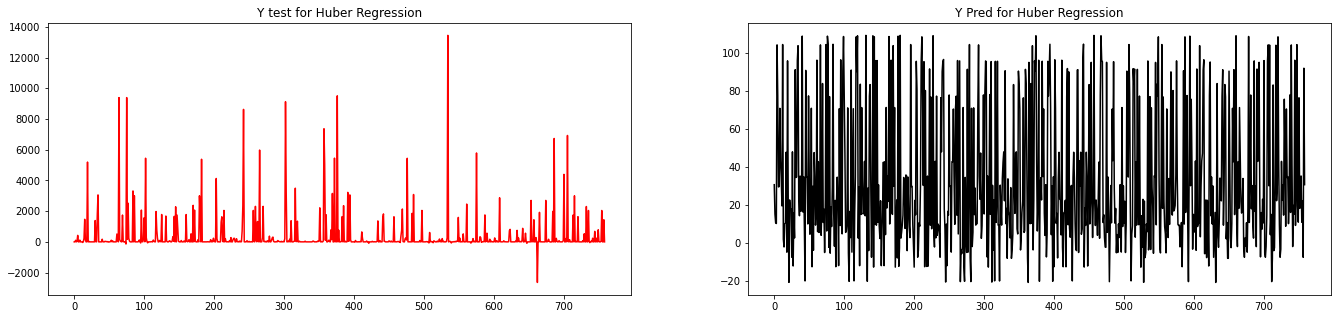

In [37]:
#For visualizing the outcome
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test, color='red', label='Regression model')
ax1.set_title("Y test for Huber Regression")
ax2.plot(test_data_range, y_pred_huber, color='k', label='Regression model')
ax2.set_title("Y Pred for Huber Regression")
plt.show()

**4.1 Method 5**

#### Q: What assumptions need to be verified at this step?
#### A: LinearRegression fits a linear model with coefficients w = w1, w2, w3, w4, ...wn to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form. SO we assume that the given dataset converges to a local minima rather than converging towads a global minima of the loss function.
#### Q: What algorithm did you choose?
#### A: Linear Regression
#### Q: Why you choose this algorithm?
#### A: The simple linear regression model takes in the input data and keeps on tweaking the weights of the loss function during each epoch. In that way we get an equation which can be used to predict the outcome for the test data.
#### Q: What metric can measure the quality of your algorithm?
#### A: R2 score and MSE.
#### Q: What is the outcome?
#### A: we got a R2 score of 0.11 and MSE to be 146717 which is so far the best score that we acheived.
#### Q: Analysis and discussion:
#### A: As we acheived a positive R2 score we shall park this model and explore more on regularizing the model using either Ridge or Lasso regression in the coming steps.

In [38]:
#                              Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_test, y_test)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('R2 Score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 1462717.01
R2 Score: 0.11


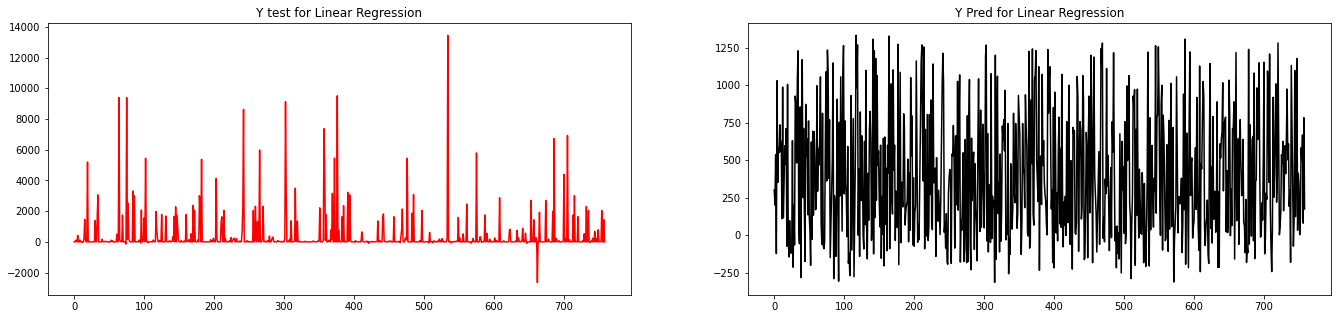

In [39]:
#For visualizing the outcome
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test, color='red', label='Regression model')
ax1.set_title("Y test for Linear Regression")
ax2.plot(test_data_range, y_pred, color='k', label='Regression model')
ax2.set_title("Y Pred for Linear Regression")
plt.show()

**4.1 Method 6**


#### Q: What assumptions need to be verified at this step?
#### A: Seeing the R2 scores of above models, we tried to find model with better R2 score which will give us an insight to take a decision on which country should do better in Maintenance techniques and which country should do better in stocking the mineral resource.
#### Q: What algorithm did you choose?
#### A: Bayesian Ridge Regression
#### Q: Why you choose this algorithm?
#### A: Bayesian Regression adapts to the data at our hand. It can be used to include regularization parameters in our decision-making procedure. The coefficient weights are slightly shifted toward zeros, which stabilizes them.
#### Q: What metric can measure the quality of your algorithm?
#### A: We would use MSE and R2 scores
#### Q: What is the outcome?
#### A: R2 score of this model is reasonably good than the before model. Seeing this we can say the big nations like US, UK, Canada and Mexico need to concentrate on maintenance and small like Norway show focus on stocking the energy resource.
#### Q: Analysis and discussion:
#### A: We can try Linear Regression at last as our data is linearly separable which can yield better R2 score so that we can make strong prediction on stocking and maintenance.


In [40]:
# code for modeling          BayesianRidge
from sklearn import linear_model
bay_reg = linear_model.BayesianRidge()
bay_reg.fit(X_train, y_train)
y_pred_bay = bay_reg.predict(X_test)
score1 = metrics.mean_squared_error(y_test,y_pred_bay)
score2 = metrics.r2_score(y_test,y_pred_bay)
print('MSE: ',score1, '  R2 Score: ', score2)

MSE:  1484320.7178916887   R2 Score:  0.0919561273425975
C:\Users\Ananth Deepak Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


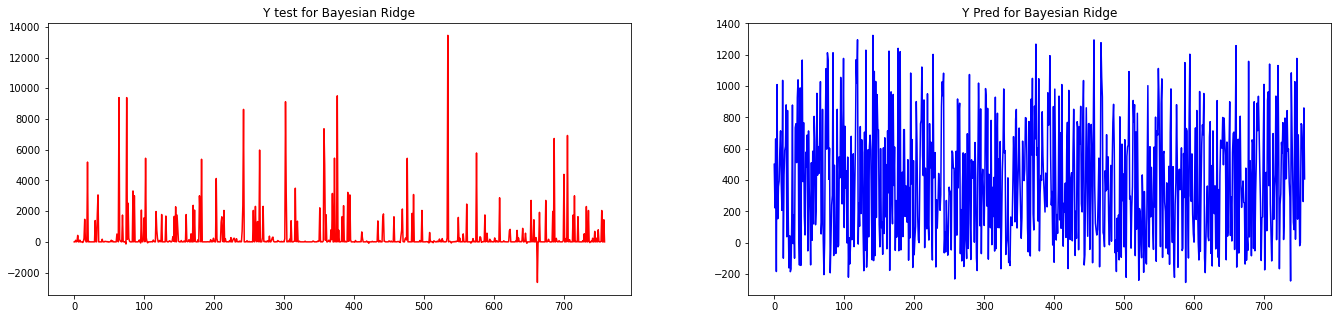

In [41]:
#For visualizing the outcome
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test, color='red', label='Regression model')
ax1.set_title("Y test for Bayesian Ridge")
ax2.plot(test_data_range, y_pred_bay, color='blue', label='Regression model')
ax2.set_title("Y Pred for Bayesian Ridge")
plt.show()

**4.1 Method 7**

#### Q: What assumptions need to be verified at this step?
#### A: We are trying to figure out the stocking and maintenance techniques that need to be done on priority by the countries as non-renewable resources are going to be more vital aspect as moving forward.
#### Q: What algorithm did you choose?
#### A: Lasso Regression
#### Q: Why you choose this algorithm?
#### A: Lasso to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 
#### Q: What metric can measure the quality of your algorithm?
#### A: MSE and R2 scores
#### Q: What is the outcome?
#### A: R2 score is 0.09201330366 which is reasonably good, we can say that big countries are doing good in stocking the Natural Resources.
#### Q: Analysis and discussion:
#### A: We can see that big countries have enough stocking but unable to know about their maintenance techniques. We can try for model with better R2 so that we can make predictions whether or not countries need to improve their maintenance techniques.

In [42]:
#                              Lasso
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model = lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
score1 = metrics.mean_squared_error(y_test,y_pred_lasso)
score2 = metrics.r2_score(y_test,y_pred_lasso)
print('MSE: ',score1, '  R2 Score: ', score2)

MSE:  1484227.25545281   R2 Score:  0.09201330366165339


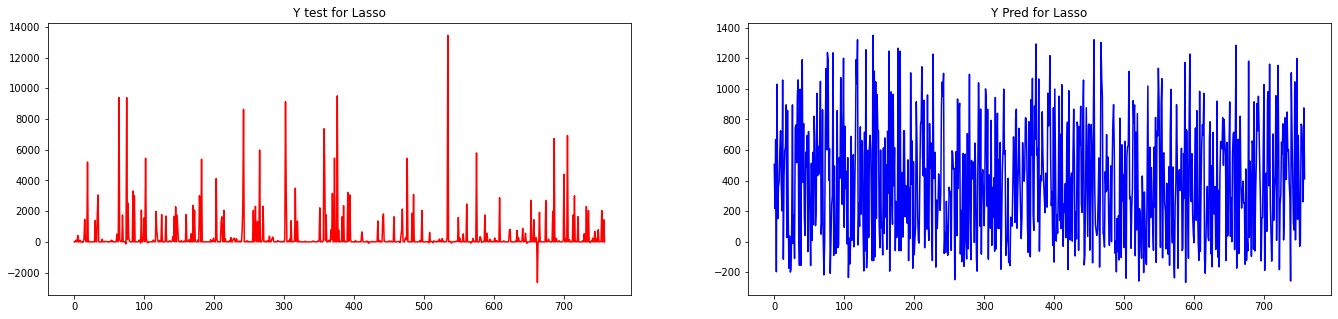

In [43]:
#For visualizing the outcome
test_data_range = range(0,759)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(23 , 5)
ax1.plot(test_data_range, y_test, color='red', label='Regression model')
ax1.set_title("Y test for Lasso")
ax2.plot(test_data_range, y_pred_lasso, color='blue', label='Regression model')
ax2.set_title("Y Pred for Lasso")
plt.show()

#### 5 Each person contribution


 

| Method | Model Code| Analysis and plan for future model|
|----------------------------|--------------------------------|-------------|
| Linear Regression| Deepak| Omkar| 
| Generalized Linear Regression| Deepak| Omkar|
| Support Vector Machine| Deepak| Omkar|
| Bayesian Ridge Regression| Omkar| Deepak|
| Lasso Regression| Omkar| Deepak|
| Huber Regression| Omkar| Deepak|



#### 6 Example

#### Q: What assumptions need to be verified at this step?
#### A: A Hospital Care chain wants to open a series of Emergency-Care wards within a region. We assume that the hospital knows the location of all the maximum accident-prone areas in the region. They have to decide the number of the Emergency Units to be opened and the location of these Emergency Units, so that all the accident-prone areas are covered in the vicinity of these Emergency Units. We want to help to decide the location of these Emergency Units so that the whole region is covered.
#### Q: What algorithm did you choose?
#### A: k-means
#### Q: Why you choose this algorithm?
#### A: After observing the data, we don't know how many locations there are, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. Therefore, we choose k-means algorithm. **I already have completed PCA to map my data to 2 dimension for k-means algorithm.**
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Percentage of Variance Explained (PVE) to evaluate clustering algorithm.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 90% of data) and test dataset (contains 10% of data). I used the test data to evaluate the outcome of k-means algorithm. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. I will use Elbow method and Silhouette analysis for evaluation.
+ Elbow method:
We use elbow method to check the k we choose.
The following figure shows the result: ...
+ Silhouette analysis: ...

#### Q: Analysis and discussion:
#### A: Accoridng the visualization of clustered data, we could conclude the location of these Emergency Units, which shows in the following image. ......

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline;
    5 – complete 1 algorithm with complete analysis and discussion;
    10 – complete 2-3 algorithms with complete analysis and discussion;
    15 – complete 4 algorithms with complete analysis and discussion;
    20 - complete 5 algorithms with complete analysis and discussion, however, the report is the best when compared with other teams;
    25 - the whole process is prefect;
    
The submission deadline is **March 21 on 11:59:00 PM**. (Note 11:59:01 PM will be counted as late submission). Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
